In [35]:
# Import all the needed modules
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from time import time
from copy import deepcopy as dp
import tqdm
from decimal import Decimal

%matplotlib inline
# Setup pyplot's figure params
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams["figure.dpi"] = 100
img_dir = "./images/"

In [36]:
def const_func(v):
    v = v
    return v

def sum_func(v):
    return np.sum(v)

def prod_func(v):
    return np.prod(v)

def poly_simple(v, x=1.5):
    n = len(v)
    res = 0
    # Decimal from decimal module is used since 1.5**~1700
    # is bigger than float
    for p, k in zip(range(n), v):
        res += Decimal(x)**Decimal(p) * Decimal(k)
        
    return res

def poly_horner(v, x=1.5):
    n = len(v)
    res = 0
    # Decimal from decimal module is used since 1.5**~1700
    # is bigger than float
    for i in range(n-1, -1, -1):
        res = Decimal(res) * Decimal(x) + Decimal(v[i])
        
    return res 

def bubble_sort(v):
    n = len(v)
    for i in range(1, n):
        swapped = False
        for j in range(n - i):
            if v[j] < v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
                swapped = True
        if not swapped:
            # If no swap was made - array is sorted
            break
    
    return v

def qucksort(v):
    return np.sort(v, kind="quick")

def timsort(v):
    return v.sort()

# Function takes list of samples and function and
# returns the elapsed time
def timeit(v, func):
    start = time()
    func(*v)
    elapsed_time = time() - start
    
    return elapsed_time

# Fucntion array with size length and random elements
# with uniformal distribution
def generate_v(length):
    return np.array([ np.random.uniform() for _ in range(length) ])

# Generate 2 random matrix with size n x n
def generate_matrixes(n):
    A = np.random.uniform(size=(n, n))
    B = np.random.uniform(size=(n, n))
    return A, B

def mult_matrix(A, B):
    return np.dot(A, B)

# Function collects average data for 5 runs
# for all function and returns array collected data
def run_test(v, A, B, n):    
    elapsed_time = [0 for _ in range(10)]
    
    for _ in range(5):
    
        run = [n]
    
        run.append(timeit( [dp(v)], const_func ))
        run.append(timeit( [dp(v)], sum_func ))
        run.append(timeit( [dp(v)], prod_func ))
        run.append(timeit( [dp(v)], poly_simple ))
        run.append(timeit( [dp(v)], poly_horner ))
        run.append(timeit( [dp(v)], bubble_sort ))
        run.append(timeit( [dp(v)], qucksort ))
        run.append(timeit( [dp(v)], timsort ))
        run.append(timeit( [dp(A), dp(B)], mult_matrix ))
    
        elapsed_time = np.array(elapsed_time) +  np.array(run)
        
    elapsed_time = np.divide(elapsed_time, 5)
    
    return elapsed_time

# Function returns a pandas.DataFrame
# with avg execution time for each iteration
# for each function
def collect_data(n_max=2000):    
    experiment_data = []
    
    for n in tqdm.tqdm_notebook(range(1, n_max+1)):
        v = generate_v(n)
        A, B = generate_matrixes(n)
        
        run_results = run_test(v, A, B, n)
        
        experiment_data.append(run_results)
        
    result = pd.DataFrame(data=experiment_data, columns=["n", "const", 
                                                         "sum", "prod",
                                                        "simple_poly", "horner_poly",
                                                        "bubble_sort", "quicksort",
                                                        "timsort", "matrix_dot"])

    return result

In [37]:
# algos_time = collect_data(2000)
# algos_time.to_csv("2000_samples.csv")

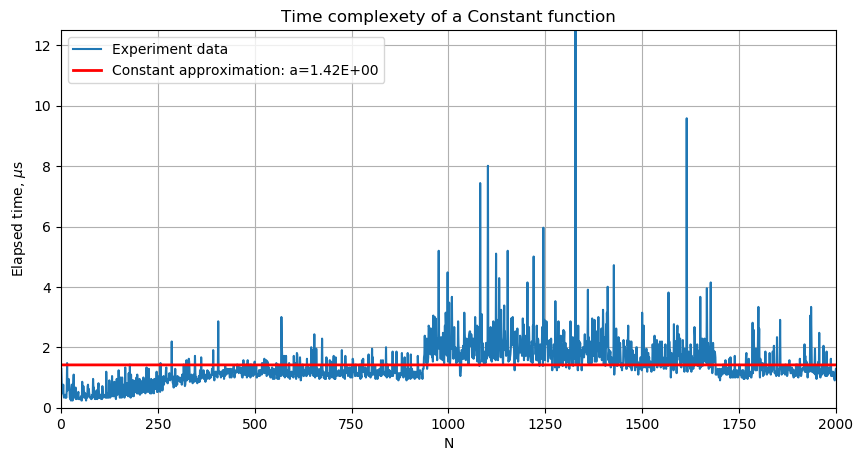

In [53]:
def const_line(x, a):
    return [a]*len(x)

# Linear function for approximation
def lin_curve(x, k, b):
    return k*x + b

# Parabola function for approximation
def parabola(x, a):
    return a*x**2

# Cubic function for approximation
def cubic_curve(x, a):
    return a*x**3

# Log function for approximation
def log_curve(x, a):
    return a*x*np.log(x)

algos_time = pd.read_csv("2000_samples.csv")
del algos_time["Unnamed: 0"]

# Following code plots experimental data
# approximates it and saves plot as a result
x_data = algos_time.n
fig, ax = plt.subplots()
plt.grid()

plt.ylim(0, 12.5)
plt.xlim(0, 2000)

ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Time complexety of a Constant function")

plt.plot(x_data, algos_time.const*10**6, label="Experiment data")

popt, pcov = curve_fit(const_line, x_data, algos_time.const*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, const_line(x_data, *popt), 'r-',  linewidth=2,
         label=f'Constant approximation: a={params[0]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "const.png")

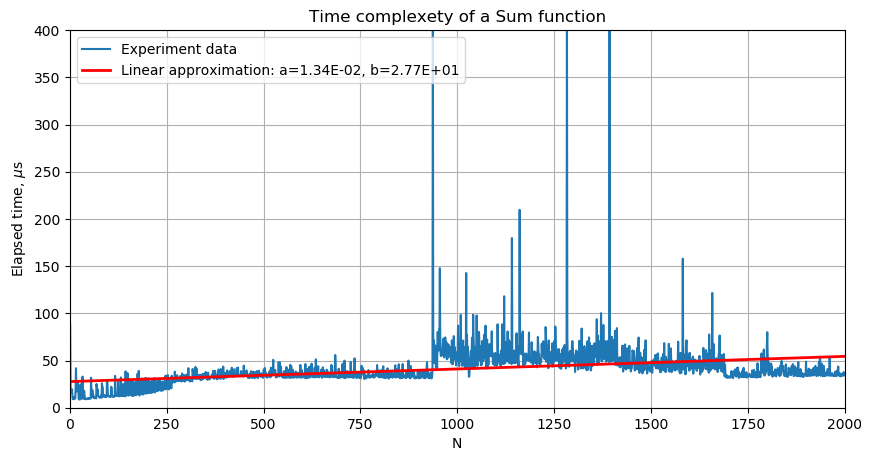

In [54]:
fig, ax = plt.subplots()
plt.grid()

plt.ylim(0, 400)
plt.xlim(0, 2000)

ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Time complexety of a Sum function")

plt.plot(x_data, algos_time["sum"]*10**6, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time["sum"]*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

# print(f"MSE: {mse(algos_time['sum']*10**6, lin_curve(x_data, *popt))}")

plt.savefig(img_dir + "sum.png")

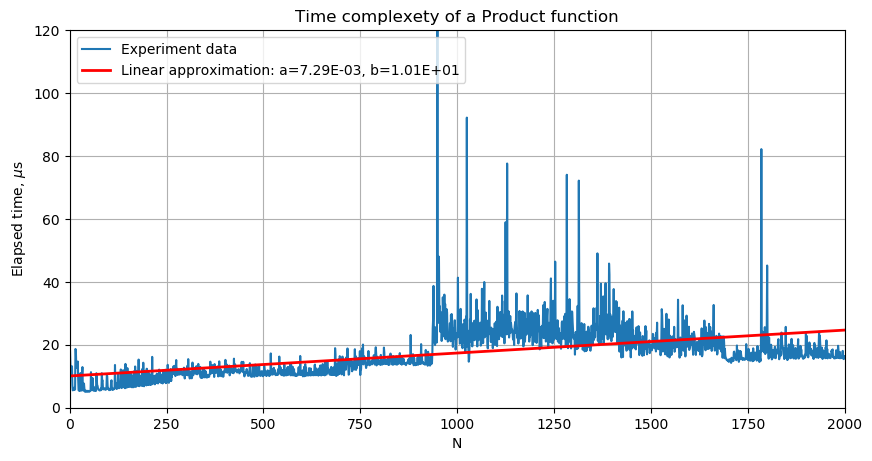

In [55]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Time complexety of a Product function")

plt.plot(x_data, algos_time["prod"]*10**6, label="Experiment data")

plt.ylim(0, 120)
plt.xlim(0, 2000)

popt, pcov = curve_fit(lin_curve, x_data, algos_time["prod"]*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "prod.png")

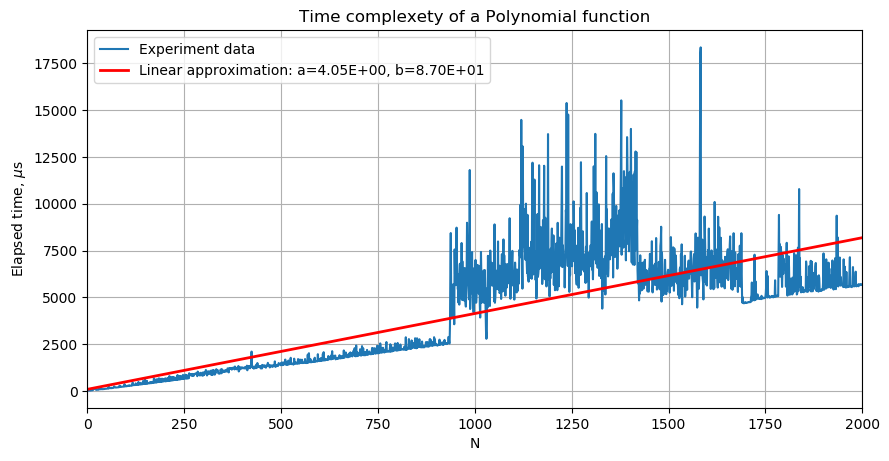

In [56]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Time complexety of a Polynomial function")

plt.xlim(0, 2000)

plt.plot(x_data, algos_time.simple_poly*10**6, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time.simple_poly*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-', linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "poly_simple.png")

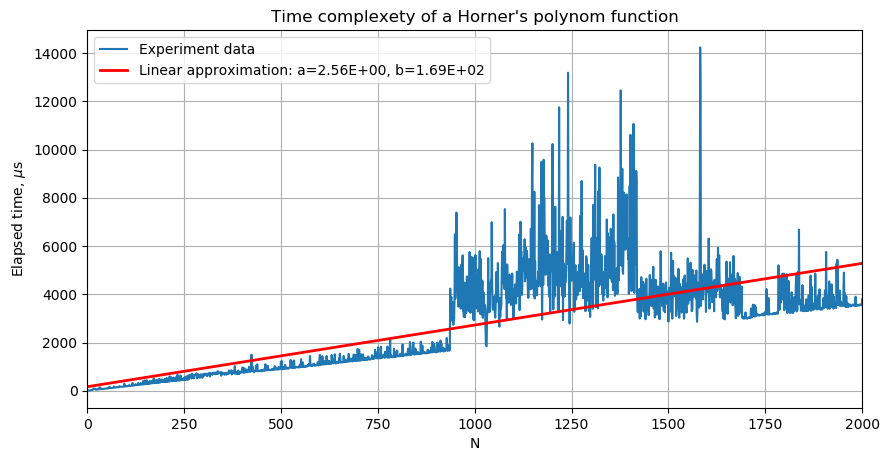

In [57]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, $\mu$s")
ax.set_title(f"Time complexety of a Horner's polynom function")

plt.xlim(0, 2000)

plt.plot(x_data, algos_time.horner_poly*10**6, label="Experiment data")

popt, pcov = curve_fit(lin_curve, x_data, algos_time.horner_poly*10**6)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, lin_curve(x_data, *popt), 'r-',linewidth=2,
         label=f'Linear approximation: a={params[0]}, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "poly_horner.png")

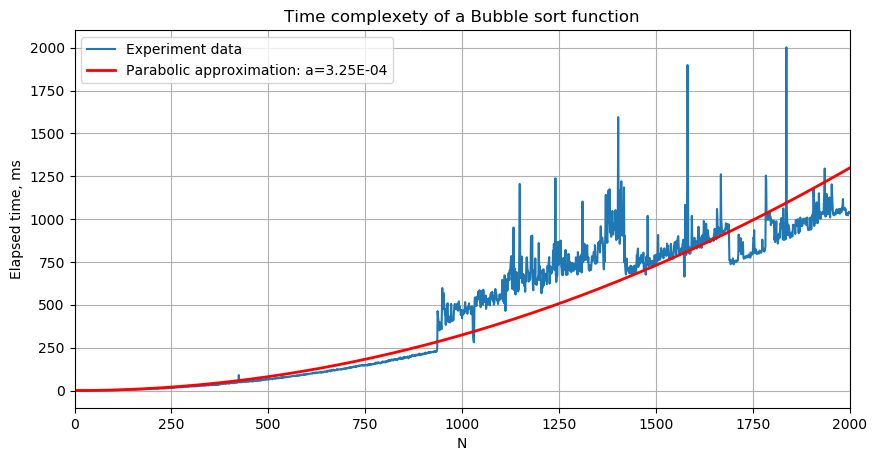

In [58]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Time complexety of a Bubble sort function")

plt.xlim(0, 2000)

plt.plot(x_data, algos_time.bubble_sort*10**3, label="Experiment data")

popt, pcov = curve_fit(parabola, x_data, algos_time.bubble_sort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, parabola(x_data, *popt), 'r-', linewidth=2,
         label=f'Parabolic approximation: a={params[0]}')#, b={params[1]}, b={params[2]}')# % tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "bubble.png")

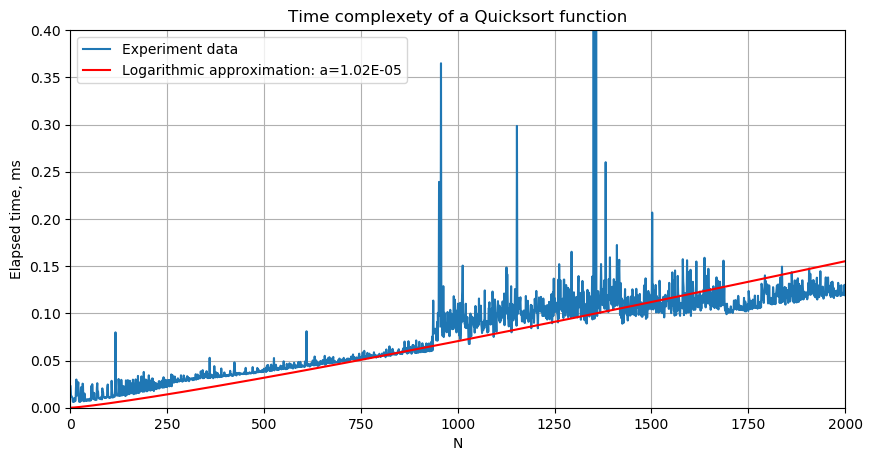

In [59]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Time complexety of a Quicksort function")

plt.ylim(0, 0.4)
plt.xlim(0, 2000)

plt.plot(x_data, algos_time.quicksort*10**3, label="Experiment data")

popt, pcov = curve_fit(log_curve, x_data, algos_time.quicksort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, log_curve(x_data, *popt), 'r-',
         label=f'Logarithmic approximation: a={params[0]}')#, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "quick.png")

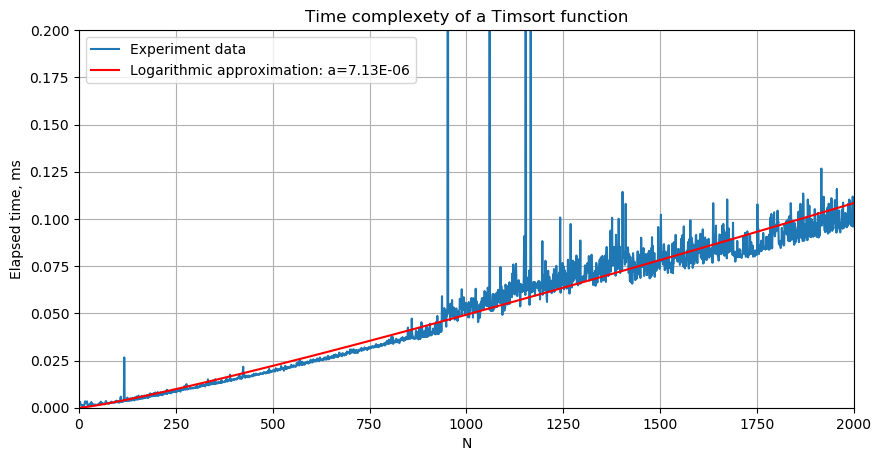

In [60]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, ms")
ax.set_title(f"Time complexety of a Timsort function")

plt.ylim(0, 0.2)
plt.xlim(0, 2000)

plt.plot(x_data, algos_time.timsort*10**3, label="Experiment data")

popt, pcov = curve_fit(log_curve, x_data, algos_time.timsort*10**3)
params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, log_curve(x_data, *popt), 'r-',
         label=f'Logarithmic approximation: a={params[0]}')#, b={params[1]}') #% tuple(params))

_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "tim.png")

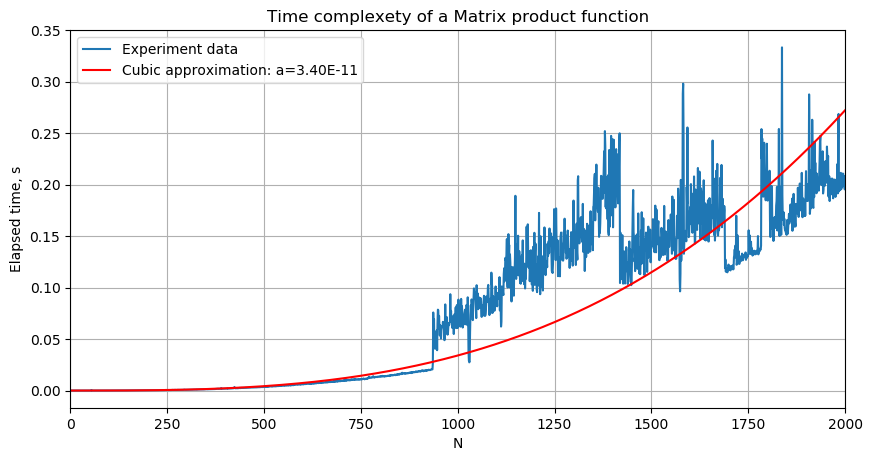

In [61]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlabel("N")
ax.set_ylabel("Elapsed time, s")
ax.set_title(f"Time complexety of a Matrix product function")

plt.xlim(0, 2000)

plt.plot(x_data, algos_time.matrix_dot, label="Experiment data")

popt, pcov = curve_fit(cubic_curve, x_data, algos_time.matrix_dot)

params = [ '%.2E' % Decimal(p) for p in popt ]

plt.plot(x_data, cubic_curve(x_data, *popt), 'r-',
         label=f'Cubic approximation: a={params[0]}') #% tuple(params))


_ = plt.legend(loc="upper left")

plt.savefig(img_dir + "matrix.png")